<img src="images/kiksmeisedwengougent.png" alt="Banner" width="1100">

<div>
    <font color=#690027 markdown="1">   
<h1>HEIGHT OF TREES AND DIMENSIONS OF STOMATA IN THE AMAZON FOREST</h1>    </font>
</div>

<div class="alert alert-box alert-success">
Researchers from Brazil used linear regression to investigate whether there is a correlation between the number of stomata on leaves in the crown of a tree and the height of the tree. In this notebook, you will work with their data and apply linear regression to it yourself. Finally, you can compare your results with those of the scientists.</div>

You can directly find the regression line using formulas from mathematics, but here you apply a technique from machine learning, by using a function from the SciPy module.

<div class="alert alert-block alert-warning">
In the learning path 'Linear regression' you will find an explanation about the basics of linear regression.</div>

Paleoclimatologists have demonstrated that there is a correlation between the number and size of stomata on leaves and the CO<sub>2</sub> level in the atmosphere when these plants grew.<br>Today, scientists worldwide are researching the stomata on today's leaves. <br> In some plants, they discovered differences in the stomata of leaves sprouted in spring compared to those in the summer. In other plants, they found differences between leaves in the crown of a plant and the shaded leaves at the bottom of the plant.<br>It is certain that the number and size of stomata are subject to environmental factors.<br> <br>The researchers Camargo and Marenco from Brazil wondered the following: <br>### Is there a correlation between the number of stomata on leaves in the crown of a tree and the height of the tree?To investigate this, they used data collected in the Amazon rainforest [1].

### Import necessary modules

In [1]:
import pandas as pd
import matplotlib.pyplot as pltimport numpy as np
from scipy.optimize import curve_fit    # for regressionfrom sklearn.metrics import r2_scorefrom sklearn.metrics import mean_squared_error

<div>
    <font color=#690027 markdown="1">   
<h2>1. Reading the data</h2>    </font>
</div>

Read in the data. The file is `amazone.csv` and is located in the *data* folder.

In [2]:
# example codeamazone = pd.read_csv("data/amazone.csv")

<div>
    <font color=#690027 markdown="1">   
<h2>2. Displaying the read data</h2>    </font>
</div>

View the data on the screen.

In [3]:
# example code# display dataset in tableamazon

,naam plant,stomatale dichtheid,lengte stomata,hoogte boom
0,Anisophyllea manausensis Pires & W. A. Rodr,271.10,17.72,24.19
1,Antonia ovata Pohl.,287.93,17.18,16.85
2,Astronium le-cointei Ducke,652.11,12.56,25.80
3,Couratari tauari Berg.,234.70,15.73,16.66
4,Duroia kotchubaeiodissteyerm,219.74,16.78,23.41
5,Ecclinusa guianensis Eyma,316.56,10.70,30.05
6,Eschweileira bracteosa (poepp. Beng) Miers,657.54,13.47,23.78
7,Eschweilera apiculata (miers) a. c. smith,442.01,14.29,29.64
8,Eschweilera coriacea (DC.) Mart. ex Berg,411.20,12.45,23.15
9,Eschweilera parviflora (Aubl.) Miers,500.10,8.25,25.35


Consider each feature.

In [4]:
x1 = amazone["stomatal density"]x2 = amazone["stomata length"]x3 = amazone["tree height"]

### Assignment 2.1Visualize the data in a scatter plot to determine whether a linear regression line makes sense for all three cases.

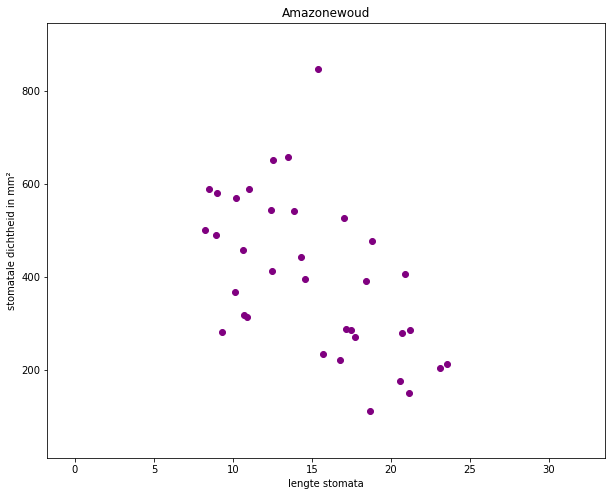

In [5]:
# example code# graphical representationplt.figure(figsize=(10, 8))
plt.xlim(x2.min()-10, x2.max()+10)plt.ylim(x1.min()-100, x1.max()+100)plt.title("Amazon Rainforest")plt.xlabel("length stomata")plt.ylabel("stomatal density in mm²")
plt.scatter(x2, x1, color="purple", marker="o")
plt.show()

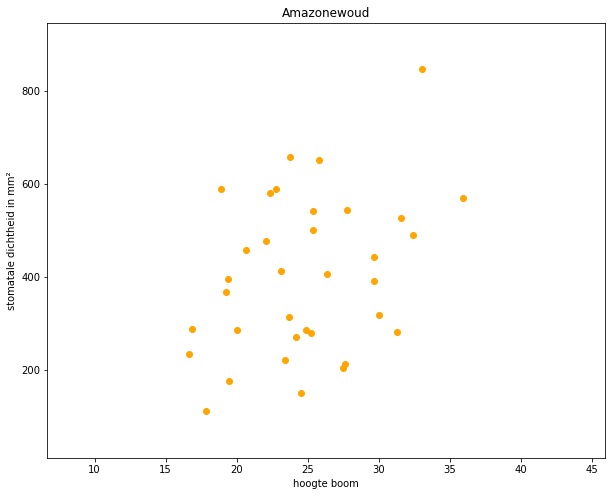

In [6]:
# example code# graphical representationplt.figure(figsize=(10, 8))
plt.xlim(x3.min()-10, x3.max()+10)plt.ylim(x1.min()-100, x1.max()+100)plt.title("Amazon Rainforest")plt.xlabel("tree height")plt.ylabel("stomatal density in mm²")
plt.scatter(x3, x1, color="orange", marker="o")
plt.show()

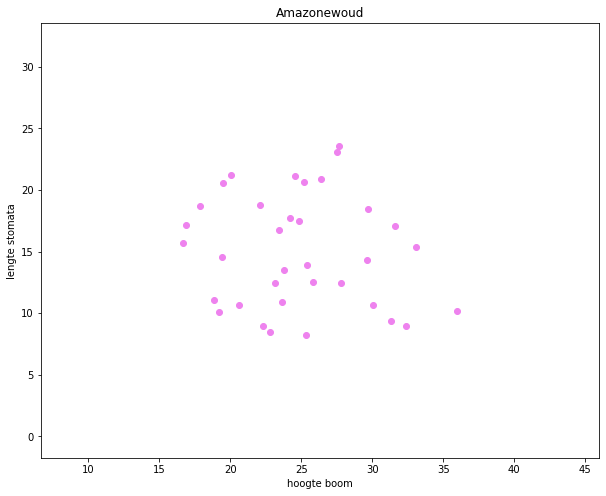

In [7]:
# example code# graphical representationplt.figure(figsize=(10, 8))
plt.xlim(x3.min()-10, x3.max()+10)plt.ylim(x2.min()-10, x2.max()+10)plt.title("Amazon Rainforest")plt.xlabel("tree height")plt.ylabel("stomata length")
plt.scatter(x3, x2, color="violet", marker="o")
plt.show()

Answer:

Answer: For all three cases, a linear regression line is possible, as the point clouds are all elliptical. However, in order to visually compare the degree of linear correlation for the different point clouds, the data must first be standardized.

<div>
    <font color=#690027 markdown="1">   
<h2>3. Investigating the linear correlation between the data through the correlation coefficient</h2>    </font>
</div>

<div class="alert alert-block alert-warning">
More explanation about the correlation coefficient can be found in the notebook 'Standardize'.</div>

### Assignment 3.1Calculate the correlation coefficients for all three cases.In other words, determine the correlation coefficient R for two features from the table. Is there a strong, moderate or weak linear relationship between the features?

In [ ]:
# correlation coefficient

In [8]:
# example code# to what extent is there a linear relationship between length and density of stomata?# determine correlation coefficient R (lies between -1 and 1, the closer to 0, the worse linear correlation)np.corrcoef(x2, x1)[0,1]

-0.5473323361748896

Answer: There is a moderate linear correlation between the length and the density of the stomata.

In [9]:
# to what extent is there a linear relationship between tree height and stomata density?np.corrcoef(x3, x1)[0,1]

0.3469699169562766

Answer: There is a weak linear correlation between the height of a tree and the stomatal density!

In [10]:
# to what extent is there a linear relationship between tree height and stomata length?np.corrcoef(x3, x2)[0,1]

-0.131061687629056

Answer: There is a very, very weak linear correlation between the height of a tree and its stomata.

### Assignment 3.2

<div class="alert alert-box alert-success">
There is a known relationship between the density of the stomata and their size. The relationship should not be considered linear, but is best represented by a curve.</div>

Does this match what you calculated?

Answer:

Answer: That could be right because only a moderate linear correlation has been established.

<div>
    <font color=#690027 markdown="1">   
<h2>4. Regression line for the relationship between stomatal density and tree height</h2>    </font>
</div>

**Camargo and Marenco determined with Excel the regression line that visualizes the, albeit weak, linear correlation between the stomatal density and the height of the tree.**- They used the rule that sets out stomatal density as a function of the height of the tree.- Using the given data, you can do this yourself with the built-in algorithms of the Python module SciPy and compare your result with theirs.
In a subsequent notebook, you do the same thing again but according to the method used by computer scientists. They reserve a portion of the data to check the quality of the model.

For both methods, the data is **standardized**.

<div class="alert alert-block alert-warning">
More explanation on the importance of standardization can be found in the notebook 'Standardize'.</div>

You will work with NumPy arrays for both methods in order to use all functionalities of NumPy.

### Assignment 4.1

- What data do you need? Which variables refer to it?- Which data goes on the x-axis and which on the y-axis?

Answer:

Answer: You will be working here with the data stored in `x1` and `x3` (`x1` contains the stomatal densities and `x3` the heights of the trees). In the graphical representation, `x3` is on the y-axis and `x1` is on the x-axis.

### Assignment 4.2Convert the data you need into NumPy arrays.

In [11]:
# example codex1 = np.array(x1)x3 = np.array(x3)print(x1, x3)

[271.1  287.93 652.11 234.7  219.74 316.56 657.54 442.01 411.2  500.1
 204.59 477.6  395.7  389.81 280.64 458.01 314.11 367.08 540.51 489.16
 405.96 110.29 150.06 285.64 569.38 284.57 277.83 212.16 580.93 588.5
 589.35 846.13 175.43 526.2  543.88] [24.19 16.85 25.8  16.66 23.41 30.05 23.78 29.64 23.15 25.35 27.5  22.09
 19.4  29.7  31.28 20.63 23.66 19.22 25.39 32.39 26.37 17.87 24.55 20.02
 35.96 24.86 25.2  27.63 22.31 22.8  18.87 33.04 19.49 31.6  27.79]


### Assignment 4.3To return from the standardized variables to the original ones, save the average and standard deviation of the data to which both variables refer, so that you can use it further in the notebook.

In [ ]:
# save average and standard deviation of variables for use later in notebook

In [12]:
# example code# save average and standard deviation of variables for use later in notebookx1_avg = np.mean(x1)x1_std = np.std(x1)x3_avg = np.mean(x3)x3_std = np.std(x3)

### Assignment 4.4Standardize the data.

In [ ]:
# standardize data

In [13]:
# standardize datax1 = (x1 - np.mean(x1)) / np.std(x1)   # stomatal densityx3 = (x3 - np.mean(x3)) / np.std(x3)   # tree height
# desired format and standard notation for regression with scikit-learnx = x3                   # x3 acts as inputy = x1                   # x1 acts as output

<div>
    <font color=#690027 markdown="1">   
<h3>4.1 Method of the Brazilian researchers (same method as in the math class)</h3>    </font>
</div>

### Assignment 4.1.1The method works as follows: first standardize the data, then convert the data to the desired format, determine the regression line and display it on a graph together with the scatter plot.
Part of this is already behind us.- Complete the assignment.- Also determine $R^{2}$ and the mean square deviation for the found straight line.

In [14]:
# example code# regression line is straight
# input how the equation of the line is constructeddef straight_line(x, a, b):"""Prescription (oblique) straight line with variable x and coefficients a and b."""return a * x + b
# searching for the line that best fits certain data, showing comparison and returning coefficientsdef linreg(x, y):"Rights best fitting with data x and y."popt, pcov = curve_fit(rechte, x, y)            # curve_fit() looks in def rechte() what the function description looks like# curve_fit() returns two things, referred to as popt and pcov    # only need the first, popt, which gives a and b of the desired straight linea, b = popt                                     # coefficientsprint("y = ", a, "x +", b)                      # show regression line equation    return a, b                                     # returns coefficients of regression line equation

In [15]:
# example code# coefficients of regression line at given pointsa, b = linreg(x, y)print(a, b)

y =  0.3469699176794403 x + -5.582336815024291e-10
0.3469699176794403 -5.582336815024291e-10


In [16]:
# example code# linear regressiony_regressionline = straight(x, a, b)

In [17]:
# sample code# metricsprint("R² for the line: %.3f" % r2_score(y, y_regressionline))print("Average squared deviation for the line: %.2f"% mean_squared_error(y, y_regression_line))

R² voor de rechte: 0.120
Gemiddelde kwadratische afwijking voor de rechte: 0.88


### Graph

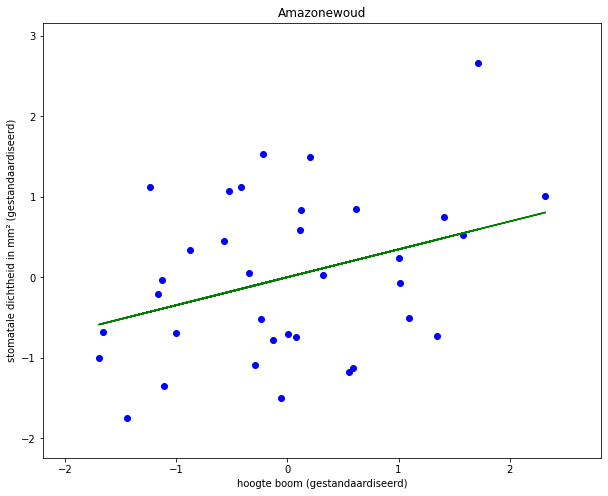

In [18]:
# example code# graphic representationplt.figure(figsize=(10, 8))
plt.xlim(x3.min()-0.5, x3.max()+0.5)plt.ylim(x1.min()-0.5, x1.max()+0.5)plt.title("Amazon Rainforest")plt.xlabel("tree height (standardized)")plt.ylabel("stomatal density in mm² (standardized)")
plt.scatter(x3, x1, color="blue", marker="o")plt.plot(x, y_regressionline, color="green")
plt.show()

In [19]:
# example code# comparison of straight line with standardized variablesprint("The equation of the line: y =", a, "x +", b)

De vergelijking van de rechte: y = 0.3469699176794403 x + -5.582336815024291e-10


<div>
    <font color=#690027 markdown="1">   
<h3>4.2 Comparing the result with that of the Brazilian scientists</h3>    </font>
</div>

### Assignment 4.2.1Compare the equation of the regression line with that of the scientists. For this, you will need to return to the original variables from the standardized variables. Make sure to use the original average and the original standard deviation.

In [ ]:
# comparison of straight line without standardizing

In [20]:
# example code# comparison of straight line without standardizingprint("The equation of the line: y =",a * x1_std / x3_std, "x +", b * x1_std + x1_gem - a * x3_gem * x1_std / x3_std)

De vergelijking van de rechte: y = 12.06844055242027 x + 102.14483934164173


Answer:

Answer: This equation corresponds to the results of the Brazilian researchers. R² also matches (R² is independent of standardization).

<div class="alert alert-box alert-success">
In a subsequent notebook, you determine the regression line using a method from machine learning. A distinction is made there between training data and test data.</div>

<div class="alert alert-block alert-warning">
In the notebooks 'SeaLevelLinearRegression', 'SeaLevelRegression' and 'SeaLevelMLRegression', you learn how to find a curve that best fits a given cloud of points, in addition to a straight line. You also learn about underfitting and overfitting.</div>

<div>
<h2>Reference List</h2></div>

[1] Camargo, Miguel Angelo Branco, & Marenco, Ricardo Antonio. (2011). <br> &nbsp; &nbsp; &nbsp; &nbsp;Density, size and distribution of stomata in 35 rainforest tree species in Central Amazonia. Acta Amazonica, 41(2), 205-212. <br> &nbsp; &nbsp; &nbsp; &nbsp;https://dx.doi.org/10.1590/S0044-59672011000200004 and via e-mail.

<div>
<h2>With support from</h2></div>

<img src="images/kikssteun.png" alt="Banner" width="1100"/>

<img src="images/cclic.png" alt="Banner" align="left" width="100"/><br><br>
Notebook KIKS, see <a href="http://www.aiopschool.be">AI at School</a>, by F. wyffels & N. Gesquière is licensed under a <a href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International-license</a>.